# Two-Sigma Financial Modeling Data Exploration

This script examines the dataset and features for the Kaggle Two-Sigma Financial Modeling Challenge.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

with pd.HDFStore('/Users/clint/Development/data/two_sigma/train.h5', 'r') as train:
    df = train.get('train')

In [2]:
# how much data do we have?
ndata = len(df)

print(ndata)

1710756


In [3]:
# lets look at the first few rows
df.head()

,id,timestamp,derived_0,derived_1,derived_2,derived_3,derived_4,fundamental_0,fundamental_1,fundamental_2,...,technical_36,technical_37,technical_38,technical_39,technical_40,technical_41,technical_42,technical_43,technical_44,y
0,10,0,0.370326,-0.006316,0.222831,-0.213030,0.729277,-0.335633,0.113292,1.621238,...,0.775208,NaN,NaN,NaN,-0.414776,NaN,NaN,-2.0,NaN,-0.011753
1,11,0,0.014765,-0.038064,-0.017425,0.320652,-0.034134,0.004413,0.114285,-0.210185,...,0.025590,NaN,NaN,NaN,-0.273607,NaN,NaN,-2.0,NaN,-0.001240
2,12,0,-0.010622,-0.050577,3.379575,-0.157525,-0.068550,-0.155937,1.219439,-0.764516,...,0.151881,NaN,NaN,NaN,-0.175710,NaN,NaN,-2.0,NaN,-0.020940
3,25,0,NaN,NaN,NaN,NaN,NaN,0.178495,NaN,-0.007262,...,1.035936,NaN,NaN,NaN,-0.211506,NaN,NaN,-2.0,NaN,-0.015959
4,26,0,0.176693,-0.025284,-0.057680,0.015100,0.180894,0.139445,-0.125687,-0.018707,...,0.630232,NaN,NaN,NaN,-0.001957,NaN,NaN,0.0,NaN,-0.007338


In [18]:
# number of assets
len(df.id.unique())

1424

In [19]:
# number of timestamps
len(df.timestamp.unique())

1813

Looks like a number of indicators have NaN values.  Maybe we can look at the counts a little further.

Lets see what fraction of each feature is NaN.

In [4]:
feature_cols = df.columns[2:-1]

for idx, val in np.sum(np.isnan(df[feature_cols])).iteritems():
    print('{} : {:.2f}  (count: {})'.format(str(idx), float(val) / ndata, val))


derived_0 : 0.04  (count: 72959)
derived_1 : 0.05  (count: 81029)
derived_2 : 0.23  (count: 398651)
derived_3 : 0.09  (count: 149471)
derived_4 : 0.24  (count: 406458)
fundamental_0 : 0.01  (count: 23947)
fundamental_1 : 0.40  (count: 679070)
fundamental_2 : 0.22  (count: 368840)
fundamental_3 : 0.27  (count: 454380)
fundamental_5 : 0.56  (count: 962020)
fundamental_6 : 0.41  (count: 701625)
fundamental_7 : 0.02  (count: 26340)
fundamental_8 : 0.22  (count: 373166)
fundamental_9 : 0.33  (count: 565567)
fundamental_10 : 0.07  (count: 112977)
fundamental_11 : 0.22  (count: 368840)
fundamental_12 : 0.06  (count: 110871)
fundamental_13 : 0.21  (count: 355138)
fundamental_14 : 0.21  (count: 356084)
fundamental_15 : 0.21  (count: 354897)
fundamental_16 : 0.21  (count: 355138)
fundamental_17 : 0.06  (count: 97222)
fundamental_18 : 0.01  (count: 15833)
fundamental_19 : 0.03  (count: 54588)
fundamental_20 : 0.06  (count: 110871)
fundamental_21 : 0.03  (count: 54333)
fundamental_22 : 0.33  (coun

Only technical_22 and technical_34 have zero NaN values.  Some of the fundamental features have 40%+ NaN values.  Something to keep in mind while analyzing the dataset.

Lets look at the response distribution and make sure it doesn't have any missing values.

In [20]:
sum(np.isnan(df['y']))

0

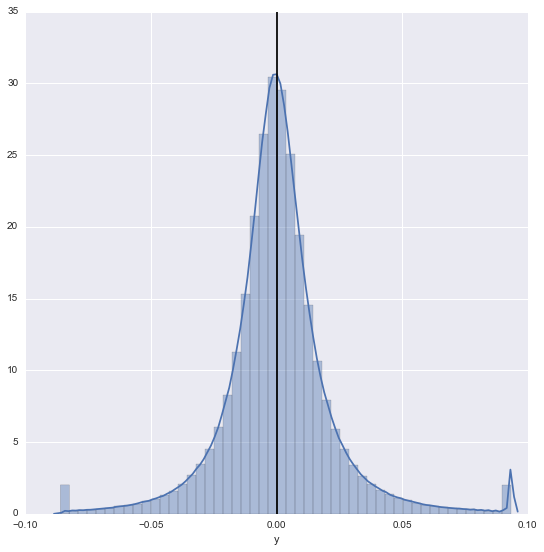

In [14]:
plt.figure(figsize=(9,9))
sns.distplot(df['y'])
sns.plt.axvline(x=0, color='k')

Most of the values are within the range -0.05 and 0.05.

There appear to be a few outliers, but this may not be the case when looking at the response relative to the specific asset it belongs to.

Lets look at how each feature correlates with the response within each asset.

In [53]:
asset_ids = df['id'].unique()
asset_df_map = {}

# group up data for each asset into a dataframe
for asset in asset_ids:
    asset_df_map[asset] = df[df['id'] == asset]
    


In [65]:
adf = asset_df_map[10]

adf[feature_cols].corrwith(adf.y)

pandas.core.series.Series

In [70]:
feature_response_corrs = {}

for asset in asset_ids:
    adf = asset_df_map[asset]
    for idx,val in adf[feature_cols].corrwith(adf.y).iteritems():
        if not np.isnan(val):
            correlations = feature_response_corrs.get(idx, [])
            correlations.append(val)
            feature_response_corrs[idx] = correlations
        

In [86]:
mean_corrs = pd.Series()
for feature in feature_cols:
    mean_correlation = np.mean(feature_response_corrs[feature])
    print('feature: {}, mean response correlation: {:.4f}'.format(feature, mean_correlation))
    mean_corrs.set_value(feature, mean_correlation)
    

feature: derived_0, mean response correlation: -0.0015
feature: derived_1, mean response correlation: 0.0023
feature: derived_2, mean response correlation: 0.0000
feature: derived_3, mean response correlation: -0.0047
feature: derived_4, mean response correlation: -0.0028
feature: fundamental_0, mean response correlation: 0.0065
feature: fundamental_1, mean response correlation: -0.0052
feature: fundamental_2, mean response correlation: 0.0187
feature: fundamental_3, mean response correlation: -0.0069
feature: fundamental_5, mean response correlation: 0.0023
feature: fundamental_6, mean response correlation: -0.0026
feature: fundamental_7, mean response correlation: 0.0359
feature: fundamental_8, mean response correlation: -0.0003
feature: fundamental_9, mean response correlation: -0.0003
feature: fundamental_10, mean response correlation: 0.0079
feature: fundamental_11, mean response correlation: 0.0167
feature: fundamental_12, mean response correlation: -0.0013
feature: fundamental_1

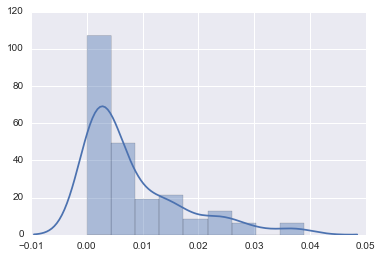

In [87]:
sns.distplot(np.abs(mean_corrs))

In [89]:
np.abs(mean_corrs).describe()

count    108.000000
mean       0.008163
std        0.008996
min        0.000030
25%        0.001706
50%        0.004799
75%        0.012022
max        0.038922
dtype: float64

In [107]:
upper_quartile = mean_corrs[np.abs(mean_corrs) >= 0.012]
print(upper_quartile)

fundamental_2     0.018667
fundamental_7     0.035937
fundamental_11    0.016703
fundamental_15    0.038922
fundamental_20    0.014409
fundamental_26    0.023339
fundamental_42   -0.014509
fundamental_53    0.019459
fundamental_55    0.021592
fundamental_56    0.025282
fundamental_57    0.029632
fundamental_60    0.027163
fundamental_62   -0.012095
technical_2      -0.013016
technical_6      -0.014573
technical_11     -0.015561
technical_14     -0.015582
technical_19     -0.022539
technical_20     -0.029724
technical_21     -0.015382
technical_27     -0.024337
technical_29     -0.013056
technical_30      0.036535
technical_34     -0.015441
technical_35     -0.024540
technical_36     -0.023968
technical_43     -0.017387
dtype: float64


In [108]:
top_features = upper_quartile.index.values

asset_df_map[11][top_features].corr()

,fundamental_2,fundamental_7,fundamental_11,fundamental_15,fundamental_20,fundamental_26,fundamental_42,fundamental_53,fundamental_55,fundamental_56,...,technical_19,technical_20,technical_21,technical_27,technical_29,technical_30,technical_34,technical_35,technical_36,technical_43
fundamental_2,1.000000,0.060446,0.999899,0.430316,0.188533,0.163227,0.289646,0.340021,0.999520,0.999692,...,-0.052186,-0.015695,-0.017497,-0.026966,0.031142,-0.072366,NaN,0.143342,0.055580,-0.256130
fundamental_7,0.060446,1.000000,0.064493,0.851691,-0.673413,0.519884,-0.293858,0.832788,0.085839,0.079787,...,0.017178,0.074447,0.004047,0.035515,-0.218732,-0.118338,NaN,-0.159588,-0.041286,0.054983
fundamental_11,0.999899,0.064493,1.000000,0.434285,0.186910,0.167539,0.289902,0.346507,0.999659,0.999623,...,-0.052075,-0.014482,-0.018892,-0.026728,0.028088,-0.071794,NaN,0.142115,0.054675,-0.254699
fundamental_15,0.430316,0.851691,0.434285,1.000000,-0.561369,0.593401,-0.218065,0.921291,0.452441,0.446500,...,-0.046342,0.044561,-0.014612,-0.090515,-0.434298,-0.060079,NaN,-0.277852,-0.185857,-0.151206
fundamental_20,0.188533,-0.673413,0.186910,-0.561369,1.000000,-0.517029,0.475157,-0.576364,0.173120,0.177950,...,-0.054628,-0.042567,-0.033581,-0.032116,0.324700,0.129751,NaN,0.288130,0.093415,0.061343
fundamental_26,0.163227,0.519884,0.167539,0.593401,-0.517029,1.000000,-0.182651,0.731530,0.176565,0.170489,...,-0.004801,0.026751,0.025985,-0.144417,-0.289644,-0.098000,NaN,-0.269019,-0.251175,-0.196240
fundamental_42,0.289646,-0.293858,0.289902,-0.218065,0.475157,-0.182651,1.000000,-0.184949,0.281253,0.282452,...,0.083459,-0.105432,-0.095781,0.209179,0.299195,0.066454,NaN,0.345696,0.290961,0.327804
fundamental_53,0.340021,0.832788,0.346507,0.921291,-0.576364,0.731530,-0.184949,1.000000,0.363764,0.355300,...,-0.145700,0.039313,-0.095308,-0.191551,-0.388786,-0.050972,NaN,-0.378814,-0.282932,-0.149440
fundamental_55,0.999520,0.085839,0.999659,0.452441,0.173120,0.176565,0.281253,0.363764,1.000000,0.999889,...,-0.057768,-0.011631,-0.022753,-0.032482,0.026670,-0.073625,NaN,0.134489,0.047791,-0.258829
fundamental_56,0.999692,0.079787,0.999623,0.446500,0.177950,0.170489,0.282452,0.355300,0.999889,1.000000,...,-0.058037,-0.012957,-0.021472,-0.032744,0.030971,-0.073782,NaN,0.136710,0.049043,-0.259843
